<font size=6>**Lecture 3: Classification**</font>
<div style="border: 1px solid lightgray; padding: 10px; background-color: #f9f9f9;">

<font size=1>

    Paolo Bonfini, 2024. All rights reserved.

This work is the intellectual property of `Paolo Bonfini`. All content produced in this notebook is original creation of the author unless specified otherwise. Unauthorized use, reproduction, or distribution of this material, in whole or in part, without explicit permission from the author, is strictly prohibited.
</font>
</div>

_NOTE: The theory and definition reported here is just a summary, for the whole picture refer to Gerone (2017) book, chapter 3._

- - -

# The simplest case: 1D class separation

Let's start from the _simplest_ possible case $\rightarrow$ a 1D case, with 2 classes.

In [2]:
#%pip install plotly
import numpy as np
import plotly
import plotly.graph_objects as go

# Set notebook mode to work in offline:
import plotly.io as pio
pio.renderers.default = 'iframe'

X = np.array([-0.2, 0.3, 0.6, 1.4, 1.7, 2.3, 2.4, 2.6, 3.1, 3.5, 4.0, 4.2, 4.9])
labels = np.array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1])

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=X[labels==0], y=np.zeros(len(X[labels==0])), mode='markers', name='class A',
    marker=dict(symbol='circle', size=20, color='royalblue')
))
fig.add_trace(go.Scatter(
    x=X[labels==1], y=np.zeros(len(X[labels==1])), mode='markers', name='class B',
    marker=dict(symbol='triangle-up', size=20, color='crimson')
))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False, 
                 zeroline=True, zerolinecolor='black', zerolinewidth=3,
                 showticklabels=False)
fig.update_layout(height=300, plot_bgcolor='white')
fig.show()

**Q:** How can I place a **separation threshold** between the two classes? (_In-class discussion_)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>
    
<b><summary>[Spoiler] (click here to expand)</summary></b>
    
$\rightarrow$ We need to define a metric for <b>classification error</b>!
   
</details>
</div>

# Logistic Regression

Let's **add the $y$ dimension**:
- we send class A to $\rightarrow$ 0
- we send class B to $\rightarrow$ +1 

... and **use a function** to 'fit' the new distribution:

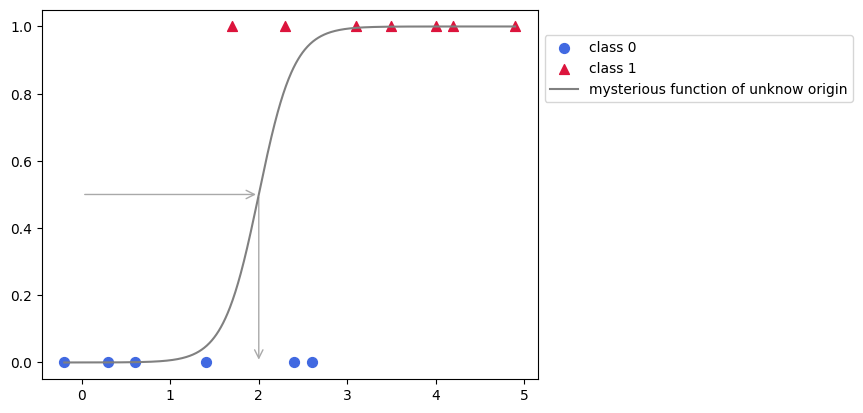

In [8]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches

# Create the additional dimension:
y = labels.copy()
y[labels == 0] = 0
y[labels == 1] = +1

# Define a function
def logistic_function(x):
    A = 5
    return 1 / (1 + np.exp(-A*(x-2)))

xx = np.linspace(np.min(X), np.max(X), 1000)

x_half = np.interp(0.5, logistic_function(xx), xx)
'''Approximate position at which the function equals 0.5.'''

fig = plt.figure()
plt.scatter(X[y == 0],  y[y == 0],  marker='o', s=50, c='royalblue', label='class 0')
plt.scatter(X[y == +1], y[y == +1], marker='^', s=50, c='crimson',   label='class 1')
plt.plot(xx, logistic_function(xx), color='grey', label='mysterious function of unknow origin')
#
# Draw arrows to the x-axis and y-axis:
arrow_to_yaxis = patches.FancyArrowPatch((0, 0.5),    (x_half, 0.5),
                 arrowstyle='->', mutation_scale=15, color='darkgrey')
arrow_to_xaxis = patches.FancyArrowPatch((x_half, 0.5), (x_half, 0),
                 arrowstyle='->', mutation_scale=15, color='darkgrey')

plt.gca().add_patch(arrow_to_xaxis)
plt.gca().add_patch(arrow_to_yaxis)

plt.legend(loc='upper left', bbox_to_anchor=(1., 0.95))
plt.show()

If the function is symmetric:

> **separation threshold** $\rightarrow$ $x_t$ | $f(x_t) = 0.5$

- $x <= x_t$ $\rightarrow$ class 0
- $x >~~x_t$ $\rightarrow$ class 1

- - -

We need to fit our function to the data: **classification** $\rightarrow$ **regression**

<u>**Linear Regression**</u> (reminder)

We saw that we can express the multi-dimensional **linear** regression model in _matrix notation_ as:

$$ \pmb{y} = \pmb{X} \pmb{\beta}$$

or equivalently, in _functional notation_, for sample $i$:

$$ y_i = \sum_{j}^p w^j x_{i}^j = \pmb{w} \pmb{x_i} $$

where $j$ is the feature index, and $\pmb{w} = [w^1, w^2, w^3, ... w^p]$ is the vector of _weights_.<br>
_NOTE: We switch to this notation to follow the usual nomenclature for Logistic Regression._

<u>**Logistic Regression**</u>

Is simply a regression task in which we switch the fitting function:

$$ y_i = \pmb{w} \pmb{x_i}$$
$$\downarrow$$ 
$$ y = {1 \over 1 + e^{-\pmb{w} \pmb{x}}}$$

_(where we omit the sample index $i$ for readibility)_

And, as usual, _fitting_ a [logistic] function means:

> <u>Find the $\pmb{w}$ that minimizes the residuals ($\hat{\pmb{w}}$)</u>

... although notice that this is NOT a linear model!

**Q:** Can you invert the formula to find the $\pmb{w}$ that minimizes the residuals? [5 mins]

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>
    
<b><summary>[Spoiler] (click here to expand)</summary></b>
    
<i>Guess what ...</i>
   
</details>
</div>

## Solving the Logistic Regression problem

There is <u>no</u> closed form solution (_no analytical solution_).

$\rightarrow$ We can solve by **Gradient Descent**!

But we need to **re-formulate** the problem a bit _more conveniently_.

Let's see it in terms of **probability**:

\begin{equation}
    p_1(\pmb{x}, \pmb{w}) = {1 \over 1 + e^{-\pmb{w} \pmb{x}}} \tag{Eq. 1}
\end{equation}

> $ p_1(\pmb{x}, \pmb{w})$ is the <u>probability</u> to obtain class 1 for a given pair ($\pmb{x}$, $\pmb{w})$

Automatically, when there are only 2 classes:

\begin{equation}
    p_0(\pmb{x}, \pmb{w}) = 1 - p_1(\pmb{x}, \pmb{w}) = 1 - {1 \over 1 + e^{-\pmb{w} \pmb{x}}} \tag{Eq. 2}
\end{equation}

> where $ p_0(\pmb{x}, \pmb{w})$ is the <u>probability</u> to obtain class 0 for a given pair ($\pmb{x}$, $\pmb{w})$

We can then solve the problem by maximizing the **conditional Likelihood**:

$$ P(\pmb{y} | \pmb{X}, \pmb{w})$$

> i.e., the probability to have obtained the **observed** classes $\pmb{y}$ (_of all samples_) if we were given $\pmb{X}$ (_of all samples_) and our Logistic model with weigths $\pmb{w}$ was a correct assumption

_NOTE: Read this statement again, carefully._

### Calculating the conditional Likelihood

$ P(\pmb{y} | \pmb{X}, \pmb{w})$ is the **total probability** for the whole dataset $\pmb{X}$ with labels $\pmb{y}$.

If each datapoint is **i.i.d.** (= _independent and identically distributed random variables_), the total probability is given by the **multiplication** of the idividual probabilities of each sample $i$:

$$ P(\pmb{y} | \pmb{X}, \pmb{w}) = P(y_0 | \pmb{x}_0, \pmb{w}) \times P(y_1 | \pmb{x}_1, \pmb{w}) \times P(y_2 | \pmb{x}_2, \pmb{w}) ... \times~P(y_n | \pmb{x}_n, \pmb{w}) $$

_E.g.: I flip a coin 10 times, which is the probability to obtain 10 heads (= class 1)?_

_IMPORTANT:_ $\pmb{x}_i$ (one sample) is a vector of $p$ features: $\pmb{x}_i = [x^0_i, x^1_i, x^2_i, ..., x^p_i]$, but it has 1 single label: $y_i$.

We can write this **compactly** as:

$$ P(\pmb{y} | \pmb{X}, \pmb{w}) = \Pi_i P(y_i | \pmb{x_i}, \pmb{w}) $$

- - -

Therefore, finding the **best-fitting** $\pmb{w}$ becomes this problem:

$$ \pmb{w} = \operatorname{argmax_{\pmb{w}}} \Pi_i P(y_i | \pmb{x_i}, \pmb{w}) $$

**However**, dealing with _products_ is usually complicated $\rightarrow$ we take the **log** (so $\Pi$ becomes a $\sum$)

> _If $\pmb{w}$ maximizes the $\Pi_i P(y_i | \pmb{x_i}, \pmb{w})$, it also maximises its log_

\begin{equation}
    \pmb{w} = \operatorname{argmax_{\pmb{w}}} \sum_i log P(y_i | \pmb{x_i}, \pmb{w}) \tag{Eq. 3}
\end{equation}

### One last semplification, and we are done

We just have to write $log P(y_i | \pmb{x_i}, \pmb{w})$, <u>completely equivalently</u>, with this **old-school trick**:

$$P(y_i | \pmb{x_i}, \pmb{w}) ~~:=~~ y_i \times log P(y_i=1 | \pmb{x_i}, \pmb{w}) ~~~+~~~ (1 - y_i) \times log P(y_i=0 | \pmb{x_i}, \pmb{w})$$

> _Because, given a sample $i$_
> - _if its $y_i$ equals 1 $\rightarrow$ $log P(y_i | \pmb{x_i}, \pmb{w}) = log P(y_i=1 | \pmb{x_i}, \pmb{w}) + 0$_
> - _if its $y_i$ equals 0 $\rightarrow$ $log P(y_i | \pmb{x_i}, \pmb{w}) = 0 + log P(y_i=0 | \pmb{x_i}, \pmb{w})$_
>
> _so the definition holds no matter the actual label._

Or, if you like this nomenclature better:

$$log P(y_i | \pmb{x_i}, \pmb{w}) ~~:=~~ y_i \times log~ p_1(\pmb{x_i}, \pmb{w}) ~~~+~~~  (1 - y_i) \times log~ p_0(\pmb{x_i}, \pmb{w})$$

To conclude, we substitute **Equation 1** and **2**:

$$log P(y_i | \pmb{x_i}, \pmb{w}) ~~=~~ y_i \times log \big[ {1 \over 1 + e^{-\pmb{w} \pmb{x}}} \big] ~~~+~~~ (1 - y_i) \times log \big[ 1 - {1 \over 1 + e^{-\pmb{w} \pmb{x}}} \big]$$

### Using Gradient Descent

We now have all the elements in Equation 3:

$$\pmb{\hat{w}} = \operatorname{argmax_{\pmb{w}}} \sum_i log P(y_i | \pmb{x_i}, \pmb{w}) $$

This is a **maximization** problem.<br>
But no worries! $\rightarrow$ We just add a "$-$" and becomes the good ol' **minimization** we saw in the previous lecture:

$$\pmb{\hat{w}} = \operatorname{argmin_{\pmb{w}}} -\sum_i log P(y_i | \pmb{x_i}, \pmb{w}) $$

where we call the summatory "**conditional log Likelihood**", $l(\pmb{w})$:

$$ l(\pmb{w}) := -\sum_i log P(y_i | \pmb{x_i}, \pmb{w}) $$

The solution $\pmb{\hat{w}}$ can be iteratively found using **Gradient Descent** to minimize $l(\pmb{w})$:

$$
\begin{equation}
 \pmb{w}^\prime \leftarrow \pmb{w} - \eta \nabla l(\pmb{w})
\end{equation}
$$

REMINDER:
$$\nabla l(\pmb{w}) = [{\partial \over \partial w^0}l(\pmb{w}), {\partial \over \partial w^1}l(\pmb{w}),, {\partial \over \partial w^2}l(\pmb{w}), ... {\partial \over \partial w^p}l(\pmb{w}) ]$$

## Thank sklearn for one-liner LogisticRegression

In [9]:
from sklearn.linear_model import LogisticRegression

# Same data as above, but formatted for sklearn:
X = X.reshape(-1, 1)
y = labels

clf = LogisticRegression(random_state=42)
clf.fit(X, y)
'''NOTE: The random state is for the Gradient Descent.'''

# Predicting
X_test = [[1.9]] # don't forget that sklearn expects 2D inputs
clf.predict(X_test) 

array([0])

Which is the **probability** that `X_test` is class 0 or 1?

$p_1$ $\rightarrow$ It is _literally_ the value on the **Logistic Function** curve!

We can get $p_0$ and $p_1$ as:

In [10]:
clf.predict_proba(X_test)

array([[0.5785813, 0.4214187]])

Where, by definition: $p_0 = 1 - p_1$

### Visualizing the results

To visualize the **Logistic Function curve**, let's predict along all the $x$-axis:

In [11]:
xx = np.linspace(np.min(X), np.max(X), 1000)
yy_model = clf.predict_proba(xx.reshape(-1, 1))[:,1]
'''NOTE: We keep only [:, 1], i.e. p_1, or else we would plot two symmetric
         curves!
''';
#yy_model = clf.predict_proba(xx.reshape(-1, 1)) # uncomment to visualize both curves

and plot:

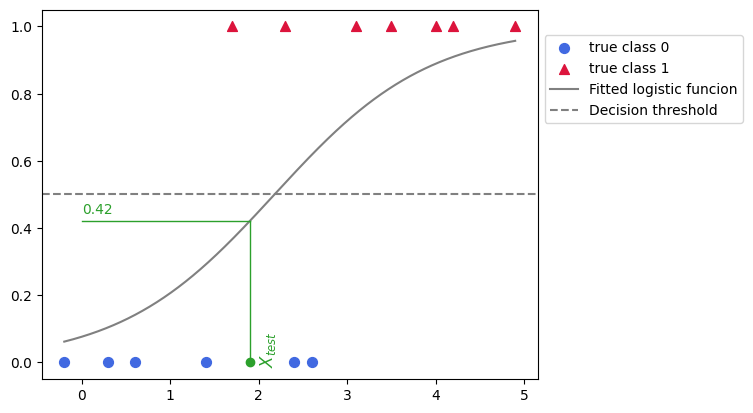

In [12]:
yhat_test = clf.predict_proba(X_test)[:,1]
'''NOTE: Keeping only p1 also for `X_test`'''

fig = plt.figure()
plt.scatter(X[y == 0],  y[y == 0],  marker='o', s=50, c='royalblue', label='true class 0')
plt.scatter(X[y == +1], y[y == +1], marker='^', s=50, c='crimson',   label='true class 1')
plt.plot(xx, yy_model, color='grey', label='Fitted logistic funcion')
#
# Draw segments to the x-axis and y-axis:
plt.plot([X_test[0][0], X_test[0][0]], [0, yhat_test[0]], 'C2', ls='-', linewidth=1)
plt.plot([0, X_test[0][0]], [yhat_test[0], yhat_test[0]], 'C2', ls='-', linewidth=1)
plt.scatter(X_test[0][0], 0, color='C2')
plt.text(X_test[0][0]*1.05, 0, '$X_{test}$', rotation=90, fontsize=12, color='C2')
plt.text(0, yhat_test[0]*1.05, str('%.2f' % yhat_test[0]), rotation=0, fontsize=10, color='C2')

plt.axhline(y=0.5, ls='--', c='grey', label='Decision threshold')

plt.legend(loc='upper left', bbox_to_anchor=(1., 0.95))
plt.show()

<u>NOTE</u>

In the book you will find the Logistic Regression classifier used <u>not</u> via `LogisticRegression` $-$ but via the **Stochastic Gradient Descent**:

```python
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42, loss='log_loss')
```

And this is because `SGD` + `log_loss` == `LogisticRegression`

<div class="alert alert-block alert-warning" style="margin-top: 20px">

#  In-class Exercise [20 min]

**Objective:** Try to predict if a person "Survived", in the provided "Titanic" test set. 

**Tasks:** 
1. Use all **numerical** features (_discard the categorical features, such as strings_) to _train_ a `LogisticRegression` model

2. Predict **the percentage** of passengers in the _test_ set who survived

3. The test set has no "Survived" column to know the _ground truth_, how to check if the results make sense?<br>
&ensp;$\rightarrow$ **compare** the distributions of probabilities in the train and test sets using **histograms**.

**Hints:** 

- _For task 1_ $-$ You can extract columns from a dataframe as:<br>
   ```python
        X = df[<column_names>].values
    ```

- _For task 3_ $-$ First, predict the probabilities for all the samples in the train/test sets with `predict_proba()`
- _Do not hit any iceberg on the way_
</div>

In [20]:
import tarfile
import pandas as pd
import io

tar = tarfile.open("L03_data_inclass_ex1.tar.gz", "r:gz")

def convert_and_load(file):
    with io.BytesIO(file.read()) as f:
        return pd.read_csv(f)

for member in tar.getmembers():
    file = tar.extractfile(member)
    if member.name == 'data/titanic/train.csv': df_train = convert_and_load(file)
    if member.name == 'data/titanic/test.csv':  df_test  = convert_and_load(file)

# Drop rows with 'nans' or icebergs:
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

print('Train:')
display(df_train.head(5))
print('Test:')
display(df_test.head(5))

Train:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


Test:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S


The attributes have the following meaning:
* **PassengerId**: a unique identifier for each passenger
* **Survived**: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.
* **Pclass**: passenger class.
* **Name**, **Sex**, **Age**: self-explanatory
* **SibSp**: how many siblings & spouses of the passenger aboard the Titanic.
* **Parch**: how many children & parents of the passenger aboard the Titanic.
* **Ticket**: ticket id
* **Fare**: price paid (in pounds)
* **Cabin**: passenger's cabin number
* **Embarked**: where the passenger embarked the Titanic

In [21]:
#df_train.describe()

<hr style='height:1px'>

_Our solution_

In [22]:
# 1. Selecting features and creating sets:
columns_numericals = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

X_train = df_train[columns_numericals].values
y_train = df_train['Survived']

X_test = df_test[columns_numericals].values

88.51% of passengers in the test set are expected to have survived


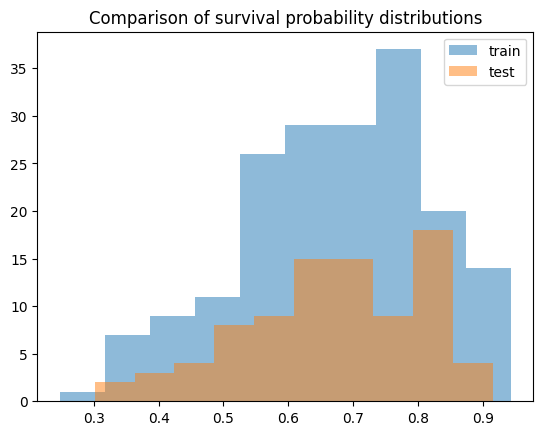

In [32]:
# 2. Fitting on train set:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

yhat_train = clf.predict(X_train)
yhat_test  = clf.predict(X_test)

# Survived:
n_survived = len(yhat_test[yhat_test==1])
perc_survived = n_survived/len(yhat_test)*100

print('%.2f%% of passengers in the test set are expected to have survived' % perc_survived)

# 3. Comparing probability distributions:
phat_train = clf.predict_proba(X_train)[:,1]
phat_test  = clf.predict_proba(X_test)[:,1]

fig = plt.figure()
plt.title('Comparison of survival probability distributions')
plt.hist(phat_train, alpha=0.5, label='train')
plt.hist(phat_test,  alpha=0.5, label='test')
plt.legend()
plt.show()

# $k$-Nearest Neighbors classifier (a.k.a. $k$NN)
 
The **$k$NN classifier** is arguably the simples ML algorithm:

> **Train** $\leftarrow$ _Store all the data (or relative distances)_
>
> **Predict** $\leftarrow$ _Return majority label of the closest $k$ instances_


<div>
   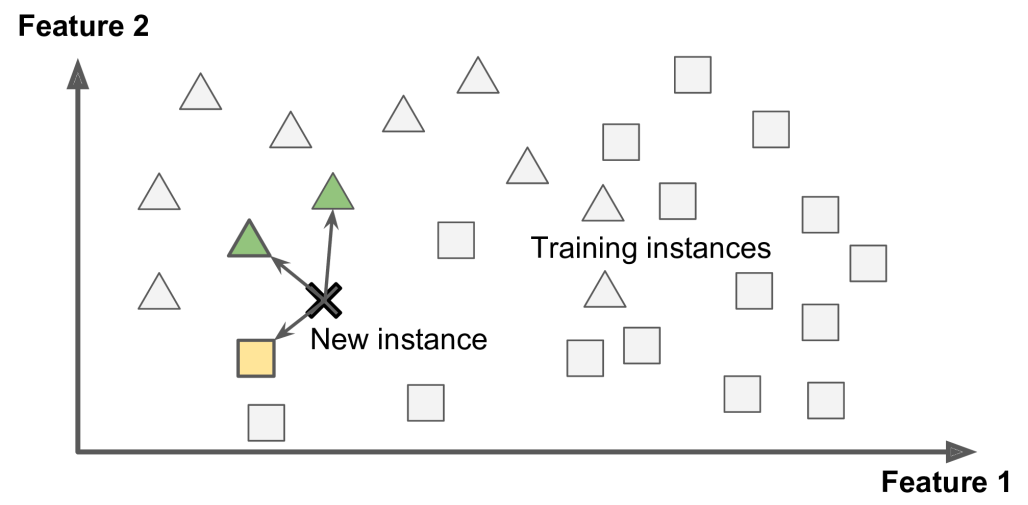
</div>

<table><tr>
    <td width=500>
        <center>
            <br>
            Figure 1. Prediction stage of a $k$NN classifier with $k$ = 3.<br>
            (From Figure 1-15 in Gerone's book)
        </center>
    </td>
</tr></table>

How to deal with **ties**?<br>
_(e.g. $k = 2$, and the one sample is class 0, while the other is class 1)?_

> $\rightarrow$ _Return class of **closest** neighbor_<br>
> or<br>
> $\rightarrow$ _Return a **random** class_<br>
> or<br>
> $\rightarrow$ _Return the class of the **first** of the $k$ neighbors_ (_`sklearn`'s default_)<br>
> or<br>
>  ... _your made up rule_


If you want to avoid troubles $-$ if you have:
> - **even** number of classes $\rightarrow$ pick an **odd** $k$
> - **odd** number of classes $\rightarrow$ pick an **even** $k$

## Back to the 1D problem

Let's go back to the 1D problem and try to classify the $X_{test}$ point using $k$NN.

In [33]:
#%pip install plotly
import numpy as np
import plotly
import plotly.graph_objects as go

# Set notebook mode to work in offline:
import plotly.io as pio
pio.renderers.default = 'iframe'

X = np.array([-0.2, 0.3, 0.6, 1.4, 1.7, 2.3, 2.4, 2.6, 3.1, 3.5, 4.0, 4.2, 4.9])
labels = np.array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1])

X_test = [[1.9]] # don't forget that sklearn expects 2D inputs

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=X[labels==0], y=np.zeros(len(X[labels==0])), mode='markers', name='class 0',
    marker=dict(symbol='circle', size=20, color='royalblue')
))
fig.add_trace(go.Scatter(
    x=X[labels==1], y=np.zeros(len(X[labels==1])), mode='markers', name='class 1',
    marker=dict(symbol='triangle-up', size=20, color='crimson')
))
fig.add_trace(go.Scatter(
    x=X_test[0], y=[0], mode='markers', name='$X_{test}$',
    marker=dict(symbol='x', size=20, color='forestgreen')
))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False, 
                 zeroline=True, zerolinecolor='black', zerolinewidth=3,
                 showticklabels=False)
fig.update_layout(height=300, plot_bgcolor='white')
fig.show()

In [34]:
from sklearn.neighbors import KNeighborsClassifier

# Same data as above, but formatted for sklearn:
X = X.reshape(-1, 1)
y = labels

clf = KNeighborsClassifier(n_neighbors=4, algorithm='brute')#, weights='distance')
clf.fit(X, y)
'''NOTE: This is a tie case.  `KNeighborsClassifier` will return the class of
         the first of the k neighbors it encounters.
         
         Uncomment the `weights` argument, and see how the classification
         changes when the distances are taken into account.
'''

# Predict:
X_test = [[1.9]] # don't forget that sklearn expects 2D inputs
clf.predict(X_test) 

array([0])

As for `LogisticRegression`, also for `KNeighborsClassifier` we can get the **probabilities** $p_0$ and $p_1$:

In [35]:
clf.predict_proba(X_test)

array([[0.5, 0.5]])

**Q:** How can `KNeighborsClassifier` **calculate** those probabilities? (_In-class discussion_)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>
    
<b><summary>[Spoiler] (click here to expand)</summary></b>
    
Probability of class $c$:
$$ p_c = {\mathcal{N}(y_i == c)\over k } ~~~,~~~for~i~\in~set(neighbors)$$
    
</details>
</div>

## $k$NN in multi-dimension, multi-class

As many other classifiers $-$ `KNeighborsClassifier` _generalizes_ to **multi-dimension**, **multi-class**.

> 3 classes, 2 features.

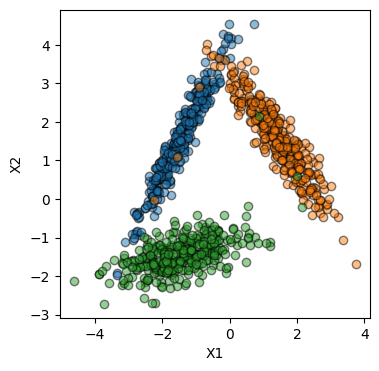

In [36]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

# Let's create some mock data:
X, y = make_classification(n_samples=1000, n_classes=3, n_features=2,
           n_informative=2, n_redundant=0, n_clusters_per_class=1,
           class_sep=1.5, shift=0, scale=1.0, random_state=42)

colors = {0: 'C0', 1: 'C1', 2: 'C2'}
# colors dictionary indexed by class label

# Plot:
fig = plt.figure(figsize=(4, 4))

plt.scatter(X[y==0,0], X[y==0,1], c=colors[0], marker='o', edgecolors='k', alpha=0.5)
plt.scatter(X[y==1,0], X[y==1,1], c=colors[1], marker='o', edgecolors='k', alpha=0.5)
plt.scatter(X[y==2,0], X[y==2,1], c=colors[2], marker='o', edgecolors='k', alpha=0.5)

plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

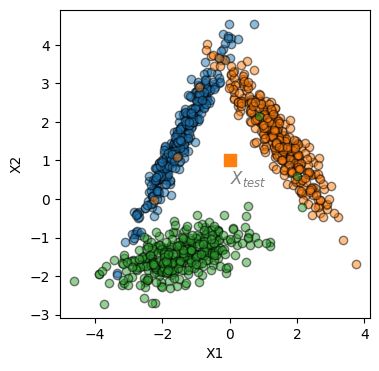

In [37]:
# Fit:
clf = KNeighborsClassifier(n_neighbors=15)
clf.fit(X, y)

'''
IMPORTANT: We should have normalized the data first, to make sure that the
    distance between points is not dominated by the feature with the largest
    dynamical range.
 
    In this case, though, we shall not worry as the features are already
    scaled when they have been generated by `make_classification`.
''';

# Predict:
X_test = [[0, 1]]
yhat_test = clf.predict(X_test) 

# Plot:
fig = plt.figure(figsize=(4, 4))

plt.scatter(X[y==0,0], X[y==0,1], c=colors[0], marker='o', edgecolors='k', alpha=0.5)
plt.scatter(X[y==1,0], X[y==1,1], c=colors[1], marker='o', edgecolors='k', alpha=0.5)
plt.scatter(X[y==2,0], X[y==2,1], c=colors[2], marker='o', edgecolors='k', alpha=0.5)
#
plt.scatter(X_test[0][0], X_test[0][1], marker='s', s=80, c=colors[yhat_test[0]])
plt.text(X_test[0][0], X_test[0][1]-0.6, '$X_{test}$', fontsize=12, color='grey')

plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### Visualizing the Decision Boundaries

So we have a _trained classifier_ `clf`.

How can we see the **boundaries** between classes?

> _In other words: we want to display which area of the plot belong to a class or another_

By repeating the prediction at _each and every point_ in the feature space, we may visualize the **decision surface**:
<br><br>

<div>
   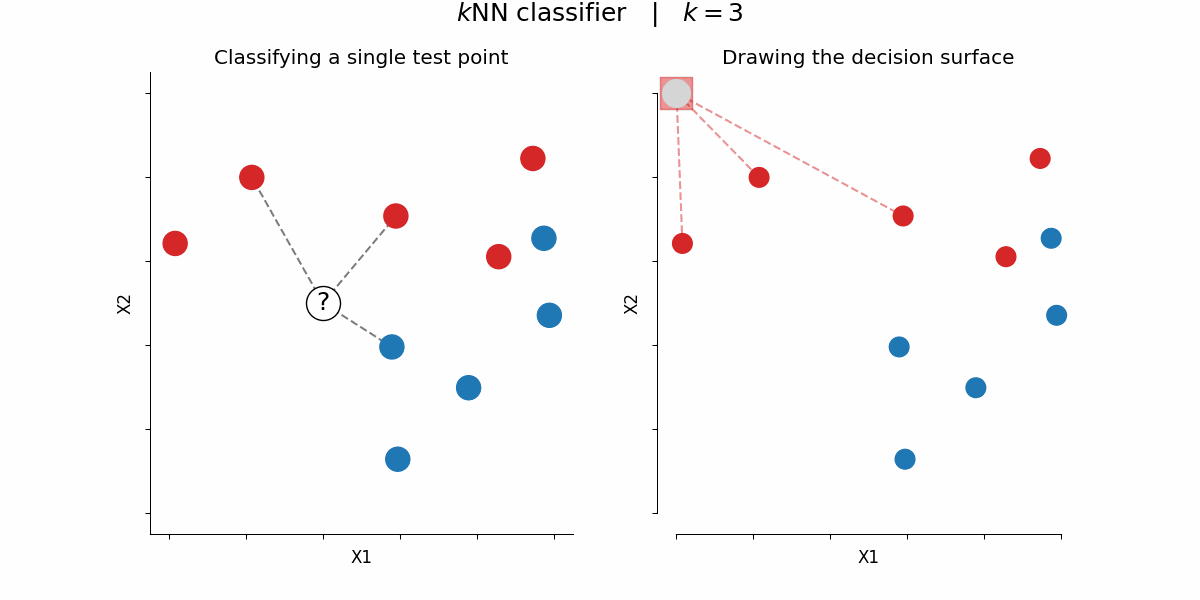
</div>

<table><tr>
    <td width=650>
        <center>
            <br>
            Figure 2. Application of a k-NN classifier considering k = 3 neighbors. <i>Left -</i> Given the test point "?", the algorithm seeks the 3 closest points in the training set, and adopts the majority vote to classify it as "class red". <i>Right -</i> By iteratively repeating the prediction over the whole feature space (X1, X2), one can depict the "decision surface".<br>
            (Image credits: Paolo Bonfini)
        </center>
    </td>
</tr></table>

Brute force! $\rightarrow$ We apply `predict()` on _all_ points on the whole ($X^1$, $X^2$) plane!

The grid we created contains 9672 points


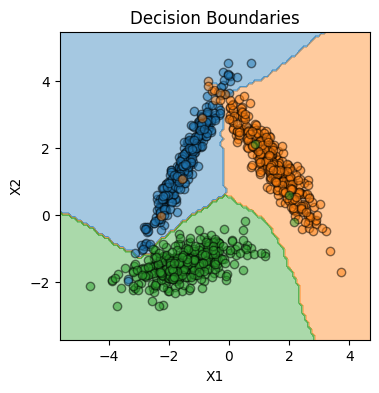

In [39]:
# Generate a grid of points to make predictions:
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
print('The grid we created contains %s points' % np.shape(xx1.ravel())[0])

# Use the KNN classifier to make predictions on the grid:
Z = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
'''Here is where the magic happens! Above we have created the (x1, x2) grid,
and now we calculate the class for each and every point.'''

Z = Z.reshape(xx1.shape)

# Create a contour plot to display the decision boundaries:
fig = plt.figure(figsize=(4, 4))

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(colors.values())

plt.contourf(xx1, xx2, Z, cmap=custom_cmap, alpha=0.4)

plt.scatter(X[y==0,0], X[y==0,1], c=colors[0], marker='o', edgecolors='k', alpha=0.5)
plt.scatter(X[y==1,0], X[y==1,1], c=colors[1], marker='o', edgecolors='k', alpha=0.5)
plt.scatter(X[y==2,0], X[y==2,1], c=colors[2], marker='o', edgecolors='k', alpha=0.5)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundaries')
plt.show()

### Visualizing the Decision Function

_Slight variation on the subject ..._

**Q:** How can we **visualize the probability** of a new sample $X_{test}$ would be classified as class 0, 1, or 2?

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>
    
<b><summary>[Spoiler] (click here to expand)</summary></b>
    
$\rightarrow$ We calculate <code>predict_proba()</code> on the whole ($X^1$, $X^2$) plane!

<i>NOTE: Since we have 3 classes, for each point <code>predict_proba()</code> will return 3 values ($p_0$, $p_1$, $p_2$)</i>
    
</details>
</div>

The grid we created contains 9672 points
'--> For each point, we have 104 probabilities, so the P matrix has shape: (93, 104)

P matrix:
 [[2 2 2 ... 1 1 1]
 [2 2 2 ... 1 1 1]
 [2 2 2 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


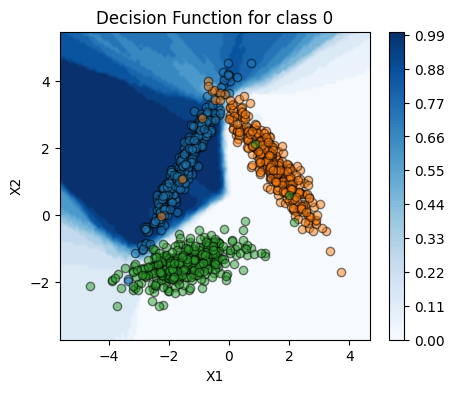

In [40]:
# Generate a grid of points to make predictions:
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
print('The grid we created contains %s points' % np.shape(xx1.ravel())[0])

# Use the KNN classifier to make predictions on the grid:
P = clf.predict_proba(np.c_[xx1.ravel(), xx2.ravel()])
'''Here is where the magic happens! Above we have created the (x1, x2) grid,
and now we calculate the probabilities for each and every point.
'''
print("'--> For each point, we have %s probabilities, so the P matrix has shape: %s" %
      (np.shape(Z)[1], np.shape(Z)))
print('\nP matrix:\n', Z)

P0 = P[:, 0]
'''We decide to display the probability to belong to class 0'''

# Plot:
fig = plt.figure(figsize=(5, 4))

# Create a filled contour plot to visualize the smoothed data:
plt.contourf(xx1, xx2, P0.reshape(xx1.shape), cmap='Blues', levels=100)
plt.colorbar()

plt.scatter(X[y==0,0], X[y==0,1], c=colors[0], marker='o', edgecolors='k', alpha=0.5)
plt.scatter(X[y==1,0], X[y==1,1], c=colors[1], marker='o', edgecolors='k', alpha=0.5)
plt.scatter(X[y==2,0], X[y==2,1], c=colors[2], marker='o', edgecolors='k', alpha=0.5)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Function for class 0')
plt.show()

# Metrics of Performance

> _a.k.a. "How do I check I am doing this right?"_

First of all $-$ in order to assess a model **performance** we need to decide on _what_ to assess it.

## Golden rule and data splitting

<table><tr>
    <td width=640>
        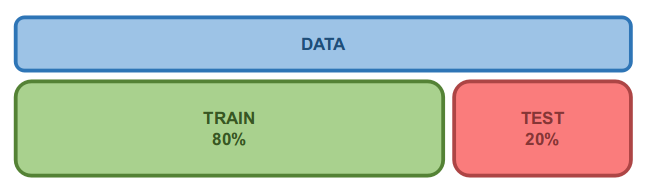
        <center>
            <br>
            Figure 3.  Indicative recipe for splitting a dataset into the analysis sets.<br>
            For very large datasets (above 10$^5$ entries), the percentage dedicated to test can be substantially smaller.
            <br>
        </center>
    </td>
</tr></table>


What are the different sets for? We already had a hint from the _previous_ lectures.

- **Train** set $~~~~~~\rightarrow$ **Learn** the model parameters

- **Test** set $~~~~~~~\rightarrow$ **Assess** the model performance

> _Assessing on the train set would lead to overfitting._

This is easily done in `sklearn` via `train_test_split`:

In [41]:
import numpy as np

X = np.random.random((100, 7))
y = np.random.random((100,))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #, random_state=42) 
print('Total datast size: %s' % len(X))
print("'--> Train set size: %s" % len(X_train))
print("'--> Test  set size: %s" % len(X_test))

Total datast size: 100
'--> Train set size: 80
'--> Test  set size: 20


<u>**Golden Rule**</u>

    "Train on train, test on test."
    
> `fit()` $\leftarrow$ applies only to $X_{train}$    
    
<u>Violation of the Golden Rule can lead to disaster</u>


<table><tr>
    <td width=600>
        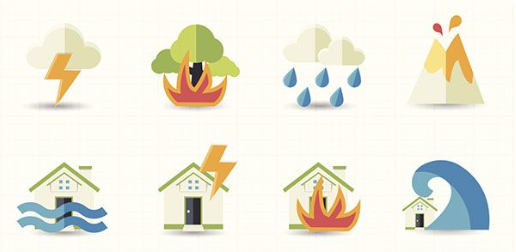
    </td>
</tr></table>

Big NO-NOs:

- - -

```python
model.fit(X)
```

- - -

```python
model.fit(X_test)
```

- - -

```python
X_n = StandardScaler().fit(X)
X_train_n, X_test_n = train_test_split(X_n)
model.fit(X_train_n)
```

## Confusion Matrix

We can build classification metrics by considering the possible **combinations of errors**.

In the case of 2 classes, we can easily display the **Confusion Matrix**:

<table><tr>
    <td width=400>
        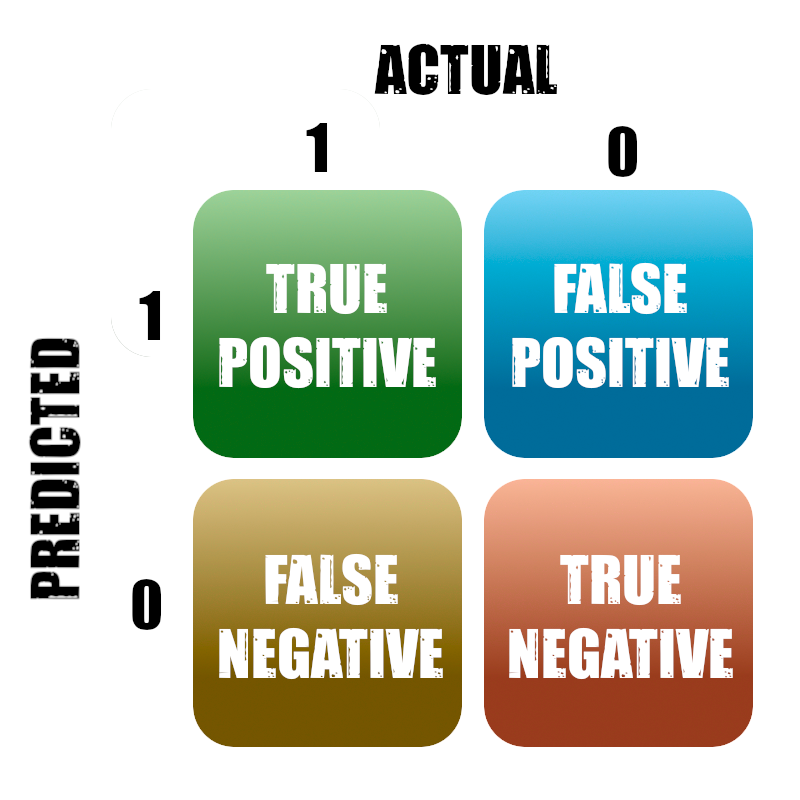
    </td>
</tr></table>

> _You can read this as:_<br>
$$ (y = \hat{y})? ~ \hat{y}$$
>_E.g. False Positive:<br>
> &emsp;&ensp; $\hat{y}$ $\rightarrow$ Positive, but $y != \hat{y}$ $\rightarrow$ False._

## Metrics

We can literally create **any** metric by combining these quantities:
- **TP** = True Positives
- **FP** = False Positives
- **FN** = False Negatives
- **TN** = True Negatives
- **P** = all actual positives = TP + FN
- **N** = all actual negatives = TN + FP

Some of the most **common metrics** ([here is a complete list](https://en.wikipedia.org/wiki/Confusion_matrix)):

$$ Accuracy ~=~ {all~correct~predictions \over all~data} ~=~ {TP + TN \over P + N }$$

$$ Recall ~=~ {correct~positives \over all~actual~positives} ~=~ {TP \over P}$$

$$ Precision  ~=~ {correct~positives \over whatever~was~predicted~positive} ~=~ {TP \over TP + FP}$$

When to use _one_ or the _other_? $\rightarrow$ <u>depends on the task</u>

> Scenario 1: We are testing a CT-scan machine that may potentially kill the patient (positive = "survive")<br>
> &emsp;&emsp;&emsp; _We want to minimize **false positives** (i.e., minimize risk of death)_ $\rightarrow$ _maximize **Precision**_


> Scenario 2: We want to hospitalize patients at risk for a health check (positive = "hospitalize")<br>
> &emsp;&emsp;&emsp; _We want to maximize **true positives** (i.e. hospitalize as many people actually at risk)_ $\rightarrow$ _maximize **Recall**_

## Confusion Matrix and metrics in sklearn

There are several **ready** functions for most of the metrics:

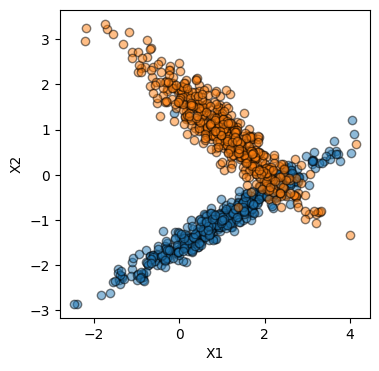

In [42]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt

# Let's create some mock data:
X, y = make_classification(n_samples=1000, n_classes=2, n_features=2,
           n_informative=2, n_redundant=0, n_clusters_per_class=1,
           class_sep=1, shift=0, scale=1.0, random_state=42)

colors = {0: 'C0', 1: 'C1'}
# colors dictionary indexed by class label

# Plot:
fig = plt.figure(figsize=(4, 4))

plt.scatter(X[y==0,0], X[y==0,1], c=colors[0], marker='o', edgecolors='k', alpha=0.5)
plt.scatter(X[y==1,0], X[y==1,1], c=colors[1], marker='o', edgecolors='k', alpha=0.5)

plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

clf = KNeighborsClassifier(n_neighbors=15)
clf.fit(X_train, y_train)

# Confusion matrix:
from sklearn.metrics import confusion_matrix

yhat_test = clf.predict(X_test)
cm = confusion_matrix(y_test, yhat_test)
print('Confusion matrix:\n%s\n' % cm)

# .. or, use the more complete `metrics.classification_report`:
from sklearn import metrics

print(f"Classification report:\n\n {metrics.classification_report(y_test, yhat_test)}") 
print(f"Confusion matrix: \n\n {metrics.confusion_matrix(y_test, yhat_test)}")

Confusion matrix:
[[101   3]
 [  9  87]]

Classification report:

               precision    recall  f1-score   support

           0       0.92      0.97      0.94       104
           1       0.97      0.91      0.94        96

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

Confusion matrix: 

 [[101   3]
 [  9  87]]


In [44]:
# For the individual metrics:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('Accuracy:  %.2f' % accuracy_score(y_test, yhat_test))
print('Precision: %.2f' % precision_score(y_test, yhat_test))
print('Recall:    %.2f' % recall_score(y_test, yhat_test))

Accuracy:  0.94
Precision: 0.97
Recall:    0.91


## The Area Under the Curve (AUC) metric

Let's go back to `LogisticRegression` and its `predict_proba()`:

In [45]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

phat_test = clf.predict_proba(X_test)[:,1]
# probabilities for each sample in X_test to belong to class 1

print('Probabilities to belong to class 1 (first 6 test samples):\n%s' % phat_test[:6])

Probabilities to belong to class 1 (first 6 test samples):
[0.9157771  0.00710017 0.25149346 0.01135919 0.00975021 0.99999116]


And we **implicitly** said that where:
- $p_1$ > 50% $~\rightarrow$ $\hat{y} = 1$
- $p_1$ <= 50% $\rightarrow$ $\hat{y} = 0$

This is what is done implicitly when we call `predict()`:

In [46]:
yhat_test = clf.predict(X_test)
# predicted class for each sample in X_test

print('Predicted classes (first 6 test samples):\n%s' % yhat_test[:6])

Predicted classes (first 6 test samples):
[1 0 0 0 0 1]


<u>**Problem 1**</u>: The probabilities are <u>not calibrated</u>!

<u>**Problem 2**</u>: If we change the treshold to, e.g. 70%, <u>all of our metrics change</u>!

<u>**Problem 3**</u>: Different thresholds may <u>favor different models</u>!

> _In other words, the intuitive threshold of 50% is actually **arbitrary**_

So the question becomes $\rightarrow$ How do I pick the **best threshold**?

> Answer: I **try them all**!


### Drawing the ROC curve

Let's do the following:
1. **predict** the probabilities ("scores")
2. **vary the threshold** for class 1 attribution, from 0% to 100%

and, for every threshold:

3. store the **True Positive Rate** (**TPR**) and **False Positive Rate** (**FPR**)

If we plot TPR $vs$ FPR we obtain the so-called **Receiving Operator Characteristic** (**ROC**) curve:

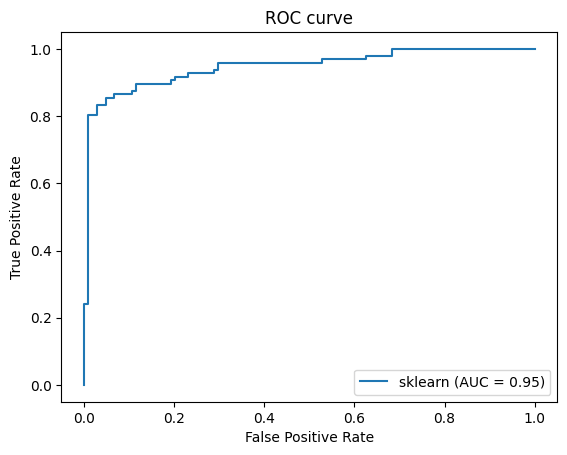

In [47]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, phat_test)
'''NOTE: `roc_curve` takes as an input the true labels and the probabilities,
          NOT the predicted classes!
'''
roc_auc = metrics.auc(fpr, tpr)

display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='sklearn')
display.plot()

plt.title('ROC curve')
plt.legend()
plt.show()

So, if we were to compare **different models**  across **all possible threshold**, which one we would select as the best?

$\rightarrow$ Let's plot their ROCs on the same graph $-$ we should observe something like that:

<table><tr>
    <td width=640>
        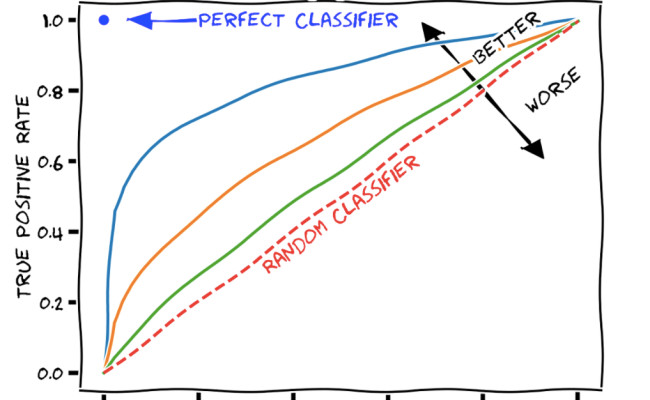
        <center>
            <br>
            Figure 4. ROC curves for different classifiers trained on the same dataset.<br>
            (<i>Author unknown</i>)
            <br>
        </center>
    </td>
</tr></table>

> The best classifier is the one that performs best, on average, over all thresholds

We can use, as a metric, the:

$\rightarrow$ **Area Under the Curve** (**AUC**)

In [48]:
from sklearn.metrics import roc_auc_score

AUC = roc_auc_score(y_test, phat_test)
print('AUC score for this classifier: %.2f (optimal classifier AUC = 1)' % AUC)

AUC score for this classifier: 0.95 (optimal classifier AUC = 1)


<div class="alert alert-block alert-warning" style="margin-top: 20px">

#  In Class Exercise

**Objective:** Draw the ROC curve for a 2 class problem. Follows, discussion of results with the class.

We will classify it using the `LogisticRegression` classifier.

_NOTE: This example presents a simplified calculation that does deal with ties (when 2 samples have the same probability to belong to class 1) $-$ for real cases just use the `sklearn` function._ 
</div>

## Preparing dataset

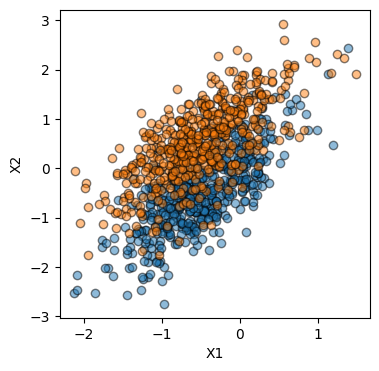

In [49]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt

# Let's create some mock data:
X, y = make_classification(n_samples=1000, n_classes=2, n_features=2,
           n_informative=2, n_redundant=0, n_clusters_per_class=1,
           class_sep=0.5, shift=0, scale=1.0, random_state=12)


colors = {0: 'C0', 1: 'C1'}
# colors dictionary indexed by class label

# Plot:
fig = plt.figure(figsize=(4, 4))

plt.scatter(X[y==0,0], X[y==0,1], c=colors[0], marker='o', edgecolors='k', alpha=0.5)
plt.scatter(X[y==1,0], X[y==1,1], c=colors[1], marker='o', edgecolors='k', alpha=0.5)

plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [53]:
# Split dataset in train and test:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Train shape:', X_train.shape)
print('Test  shape:', X_test.shape)

Train shape: (800, 2)
Test  shape: (200, 2)


In [54]:
# Define and train the classifier:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

<div class="alert alert-block alert-warning" style="margin-top: 20px">

## Calculating ROC

The task is composed of 2 steps:

1. retrieve and sort the scores produced by the classifier

2. calculate **True Positive Ratio** (**TPR**) and  **False Positive Ratio** (**FPR**) for each threshold

### Step 1

Sort the scores>

- Get the predictions and the scores
- Sort the scores
- Sort the true labels and the predicted labels in the _same_ order as
    the scores<br>

**Hint:** Sort scores using indexes, then apply to the 3 arrays.

</div>

In [84]:
######################################
######################################
# Replace "..." with the proper code #
######################################
######################################
import numpy as np

yhat_test = clf.predict(...)
phat_test = clf.predict_proba(...)[:, 1]
# probability to belong to class 1 for each sample in `X_test`

# Sort arrays by probability (high probability first):
idxs_sorted = np.argsort(...)[::-1]

y_test_s    = y_test[idxs_sorted]
yhat_test_s = yhat_test[idxs_sorted]
phat_test_s = phat_test[idxs_sorted]

assert len(np.unique(phat_test_s)) == len(phat_test_s), \
    "There are probability ties, cannot continue."

<hr style='height:1px'>

_Our solution_

In [55]:
import numpy as np

yhat_test = clf.predict(X_test)
phat_test = clf.predict_proba(X_test)[:, 1]
# probability to belong to class 1 for each sample in `X_test`

# Sort arrays by probability (high probability first):
idxs_sorted = np.argsort(phat_test)[::-1]

y_test_s    = y_test[idxs_sorted]
yhat_test_s = yhat_test[idxs_sorted]
phat_test_s = phat_test[idxs_sorted]

assert len(np.unique(phat_test_s)) == len(phat_test_s), \
    "There are probability ties, cannot continue."

<div class="alert alert-block alert-warning" style="margin-top: 20px">

### Step 2

Calculate TPR and FPR for each threshold.

- Create a new 'proxy' predictions array <yhat_test_s_prime> and set all
  predictions to class 'False'.

- Then, start iterating through the thresholds:
    1. Start from the largest score value, set the threshold to that value
    2. Set all predictions above that threshold to class 'True'
    3. Calculate TPR and FPR for this threshold, and store
    4. Move threshold to the second largest score value, and repeat from 2

Since you have as many thresholds as scores, you will end up with as many
TPRs (FPRs) as samples.

- - -

**Hint**: A quick way to count the True Positives (TPs) is to check where
       the actual label is 'True' and the proxy label is 'True' as well.
       Because the variables are boolean, you can use the 'logical AND' $-$
       something like this:
       
> TP = count ( y_true AND y_proxy )
            
Look at the_ <code>np.logical_and</code> _function.
You can use the same trick to calculate FN, FP, and TN.

Once you have those, just apply the definitions:
> TPR = TP/(TP+FN)
>
> FPR = FP/(FP+TN)

</div>

In [85]:
######################################
######################################
# Replace "..." with the proper code #
######################################
yhat_test_s_prime = np.zeros(len(yhat_test_s), dtype=bool)

TPRs = []
FPRs = []

for i in range(len(phat_test_s)):
        
    yhat_test_s_prime[:i] = 1
    
    TP = len(np.where(np.logical_and(yhat_test_s_prime, y_test_s.astype(bool)) == 1)[0])
    FN = len(np.where(np.logical_and(~yhat_test_s_prime, y_test_s.astype(bool)) == 1)[0])

    FP = ...
    TN = ...

    TPR = ...
    FPR = ...
    
    TPRs.append(TPR)
    FPRs.append(FPR)

<hr style='height:1px'>

_Our solution_

In [56]:
yhat_test_s_prime = np.zeros(len(yhat_test_s), dtype=bool)

TPRs = []
FPRs = []

for i in range(len(phat_test_s)):
        
    yhat_test_s_prime[:i] = 1
    
    TP = len(np.where(np.logical_and(yhat_test_s_prime, y_test_s.astype(bool)) == 1)[0])
    FN = len(np.where(np.logical_and(~yhat_test_s_prime, y_test_s.astype(bool)) == 1)[0])

    FP = len(np.where(np.logical_and(yhat_test_s_prime, ~y_test_s.astype(bool)) == 1)[0])
    TN = len(np.where(np.logical_and(~yhat_test_s_prime, ~y_test_s.astype(bool)) == 1)[0])

    TPR = TP/(TP+FN)
    FPR = FP/(FP+TN)
    
    TPRs.append(TPR)
    FPRs.append(FPR)

## Plot the ROC curve

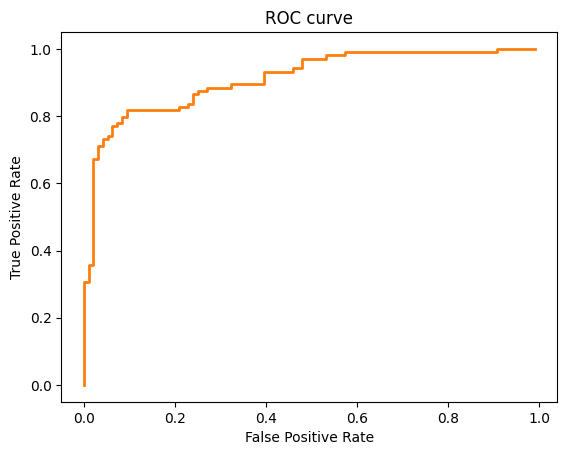

In [57]:
plt.plot(FPRs, TPRs, lw=2, c='C1')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Comparison agains sklearn function

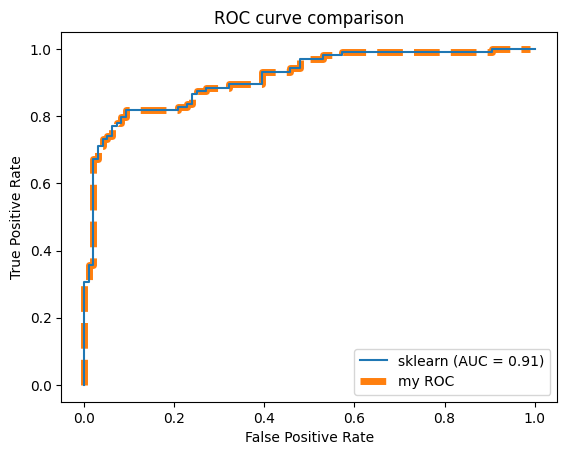

In [58]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, phat_test)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='sklearn')
display.plot()
plt.plot(FPRs, TPRs, '--', lw=5, label='my ROC', c='C1', zorder=-1)

plt.title('ROC curve comparison')
plt.legend()
plt.show()

<hr style='height:1px'>

**IMPORTANT**: Do NOT forget to write your group name in the cell below, and rename this file to \<group\>\_HW\<N\>\_2024.ipynb, where "\<group\>" is your group name and \<N\> is the Homework number.

_It's enough that 1 student of the group submits the solutions for the whole group._

You can leave the above code or $-$ _better!_ $-$ remove it.  But, in any case, <u>make sure</u> that the notebook gives the results you expected when it's run from top to bottom (you might have saved variables in blocks executed before and then deleted!).  We will not debug it for you!

**Group name**: _ _ _ _ _ _

<hr style='height:1px'>

# HomeWork 03

<font size=1>
    Nikolaos Vasilas & Elias Kyritsis, 2024. All rights reserved.
</font>  

<div class="alert alert-block alert-warning" style="margin-top: 20px">
       
**Exercise 1: Classification models**
    
Congratulations! You now know about the 2 most basic problems of Machine Learning: Regression and Classification.
The aim of this exercise is to star developing good methodologies when starting a new project while tackling a more realistic problem.

Suppose you work in the medical industry as a data analyst, and your task is to build a model to predict whether a patient's breast cancer is **Benign** or **Malignant**.
<br><br>
    
**Objective:** 
<br>
The dataset you are provided contains information about the characteristics of cell nucleii, computed from digitized images of a fine needle aspirate (FNA) of a breast mass.
It includes data for **569 patients**.

The features included in the dataset are:

    Radius (mean of distances from center to points on the perimeter)
    Radius_err (standard error of the Radius)
    Smoothness (local variation in radius lengths)
    Smoothness_err (local variation in radius lengths)

The '**Diagnosis**' column indicates the kind of the breast cancer: **B:** Benign and **M:** Malignant.
    
The ultimate objective is to create a model capable of separeting if a patient have Benign or Malignat cancer. 
<br><br>
    
**Tasks:**
<br>

- **Ex 1.1**:<br>
    Load the data from the file `HW03_data.csv`.
    Create a class that takes as arguments your `X` and `y` values. You need to create two type of methods: 
    
     - A method capable of splitting the data into training and testing sets, normalize them and return them to the user.
     - Methods that can plot (_i.e., they don't return anything; they just plot_) diagrams that helps you see correlations in your data or help you predict difficulties that the model might encounter. 
    
    Then:
    - Test your class with your data and comment on the resulting plots.
    - Based on the dynamic range of your data, do you think that a data standardization is needed? 
    - Do you expect that a classifier (_whatever that may be_) will encounter difficulties in classifying the instances? 
<br>
    
- **Ex 1.2**:<br>
    Which performance metric is the optimal for this problem: **Accuracy**, **Precision**, or **Recall**?<br>
    Choose one and briefly explain the reason. 
<br>
    
- **Ex 1.3**:<br>
    In the **$k$-Nearest Neighbors classifier** algorithm, one of the most important hyperparameters is the '**distance metric**'.<br>
    There are plenty of available distance metrics, and the choice on which to use strongly depends on the specific characteristics of the dataset. Some of the most common metrics are the **Manhattan**, the **Euclidean**, and the **Minkowski**.
    
    - Iterate and train the $k$-NN classifier using different distance metrics, and print the result of the selected _performance_ metric for each _distance_ metric.
    - Based on this analysis, decide which distance metric is better for your problem.
<br>

- **Ex 1.4**: <br>
    For your **best model** (_i.e., the one using the distance metric that maximizes your selected performance metric_), print the **classification report** and plot the **Confusion Matrix**. 
<br>
    
- **Ex 1.5**: <br>
    Normalize the confusion matrix (_to have values between 0 and 1_), print the normalized confusion matrix, and take a look at its trace (_i.e., the values along the diagonal_).<br>
    - Can you map the values of the trace with values from the **classification report**? 
    - Can you explain why the trace matches the values of the recall score? 
<br><br>

- **Ex 1.6**:<br>
    For the positive class (**Malignant**), plot the Receiver Operating Characteristic (**ROC**) curve and discuss where you would set the threshold to strike the _best balance_ between **FPR** and **TPR**.
<br>

**Hints:**

- _For Ex 1.1_ $-$ Use already existing libraries! You will get full mark for just plotting two diagrams, but you will receive bonous boints for every extra but relevant plot you add. Use Google and you imagination!
<br>

- _For Ex 1.3_ $-$ You can read about the definition of differet metrics [here](https://en.wikipedia.org/wiki/Minkowski_distance). The documentation of the $k$-NN algorithm is [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). You can define the different metrics by changing either the name of the ```metric``` hyperparameter or the value of the ```p``` hyperparameter in the $k$-NN algorithm.

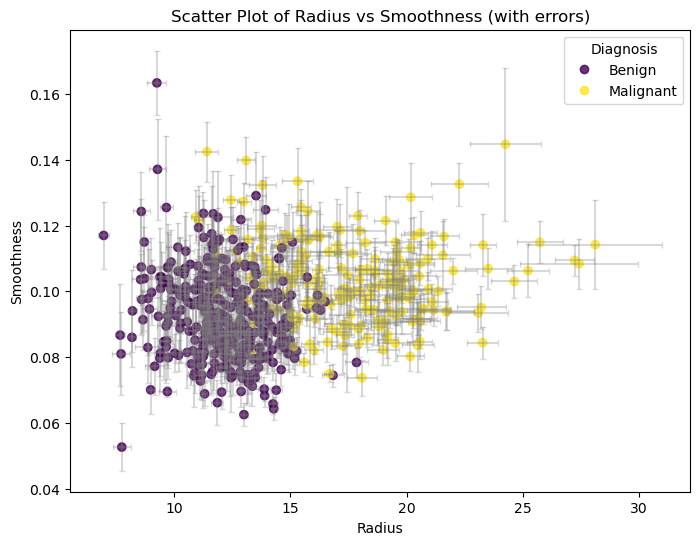

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

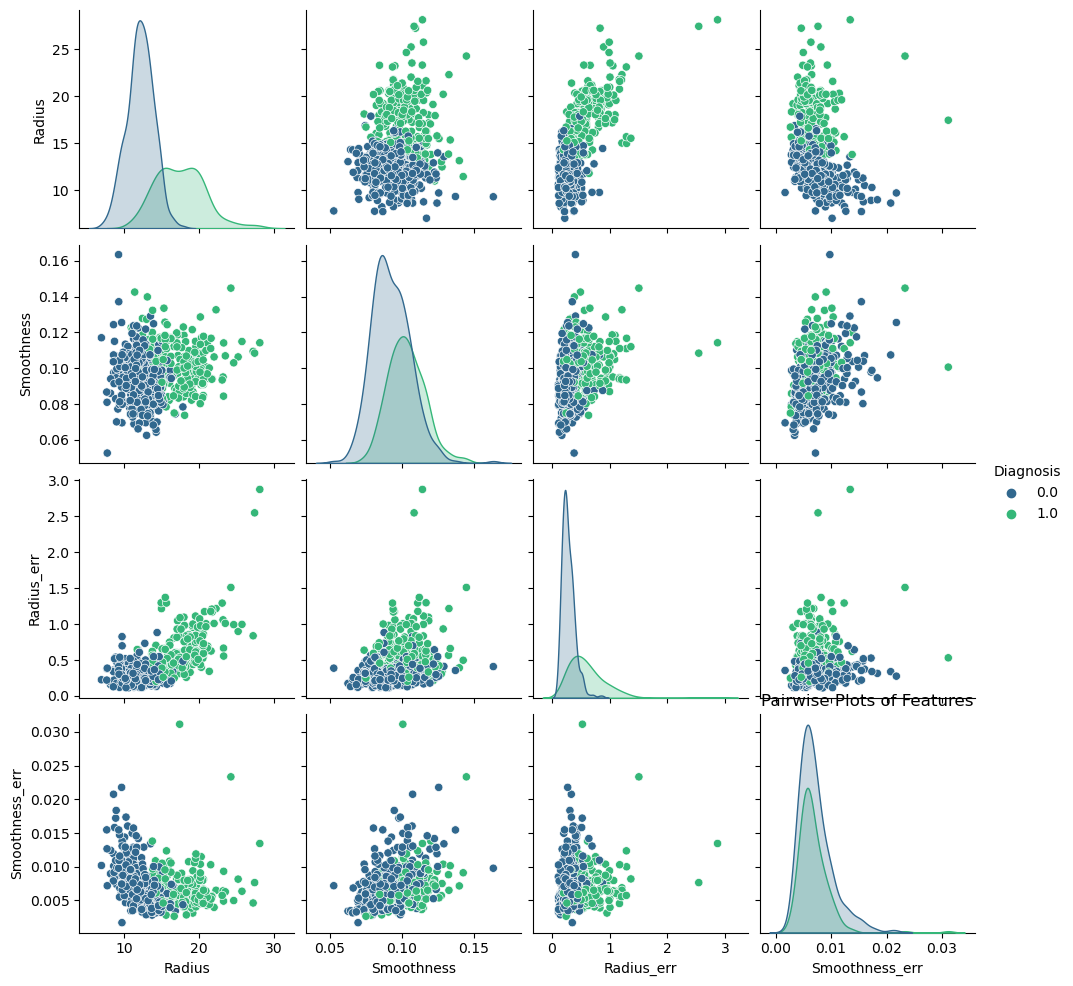

Distance Metric: euclidean
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93        71
         1.0       0.90      0.86      0.88        43

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.91       114
weighted avg       0.91      0.91      0.91       114

Recall: 0.8605

Distance Metric: manhattan
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        71
         1.0       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Recall: 0.9302

Distance Metric: minkowski
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93        71
         1.0       0.90      0.86      0.88        43

    accuracy                           0.91       114
   macro avg   

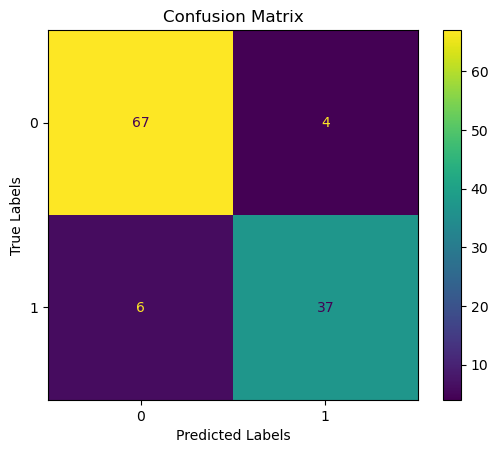

Normalized Confusion Matrix:
[[0.94366197 0.05633803]
 [0.13953488 0.86046512]]


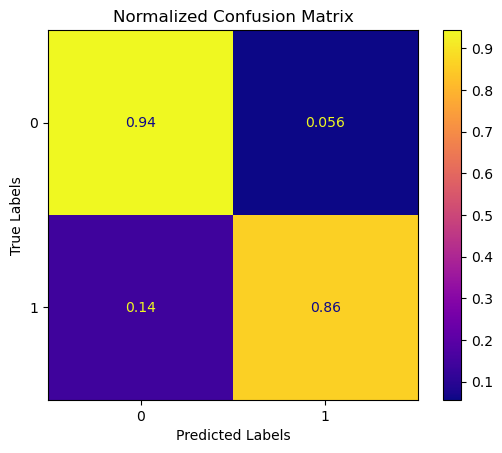

Trace of the Normalized Confusion Matrix: 1.804


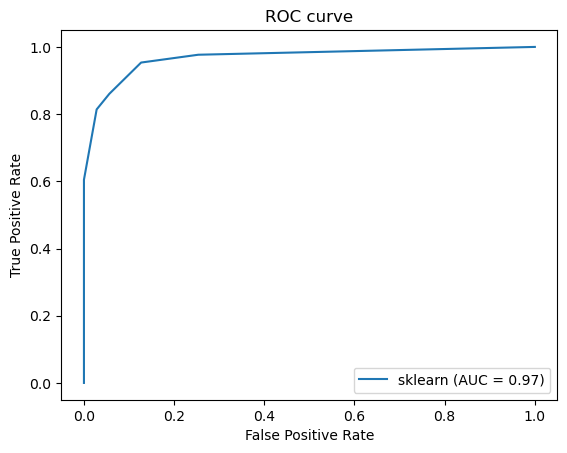

In [6]:
import pandas as pd
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, recall_score

df = pd.read_csv('C:/Users/micha/Desktop/python_datafiles/HW03_data.csv')
df['Diagnosis'] = df['Diagnosis'].replace({'B': 0., 'M': 1.})

X = df[['Radius', 'Smoothness', 'Radius_err', 'Smoothness_err']]
y = df['Diagnosis']

class CancerData:
    
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.df = pd.concat([X, y], axis=1) 
        
    def split_and_normalize(self, test_size=0.2, random_state=42):
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=test_size, random_state=random_state)
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        return X_train, X_test, y_train, y_test
    
    #def plot_correlation_matrix(self):
        #plt.figure(figsize=(6, 5))
        #correlation = df.corr()
        #sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", square=True)
        #plt.title("Correlation Matrix")
        #plt.show()

    #def plots(self): 
     #   p = sns.PairGrid(data=self.df, hue="Diagnosis", palette="viridis")
      #  p.map(plt.scatter, s=35, edgecolor="black",lw=0.5)
       # p.add_legend()    
       # plt.suptitle("Correlation Plots of All Combinations", y=1.02)
       # plt.show()
    
    def plot_pairwise(self):
        # Δημιουργία scatter plots για όλους τους συνδυασμούς
        pair_df = self.X.copy()
        pair_df['Diagnosis'] = self.y  # Προσθήκη της στήλης Diagnosis
        sns.pairplot(pair_df, hue='Diagnosis', palette='viridis', diag_kind='kde')
        plt.title("Pairwise Plots of Features")
        plt.show()
    
    def plot_scatter_with_errors(self):
        plt.figure(figsize=(8, 6))
        scatter = plt.scatter(df['Radius'], df['Smoothness'], c=df['Diagnosis'], cmap='viridis', alpha=0.8, label='Data Points')
        plt.errorbar(df['Radius'], df['Smoothness'], xerr=df['Radius_err'], yerr=df['Smoothness_err'], fmt='none', ecolor='gray', alpha=0.3, capsize=2)
        
        plt.title("Scatter Plot of Radius vs Smoothness (with errors)")
        plt.xlabel("Radius")
        plt.ylabel("Smoothness")
        handles, labels = scatter.legend_elements()
        plt.legend(handles, ['Benign', 'Malignant'], title='Diagnosis', loc='upper right')
        plt.show()


klasi = CancerData(X, y)
X_train, X_test, y_train, y_test = klasi.split_and_normalize() 
klasi.plot_scatter_with_errors()
klasi.plot_pairwise()
#klasi.plot_correlation_matrix()

#comment on plots+++

#EX.2 Accuracy, Precision, or Recall?
#we choose recall as the most accurate metric for this problem as we want to detect as much as possible positive values

#EX.3

metrics_ = ['euclidean', 'manhattan', 'minkowski']
results = {}

for metric in metrics_:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test) #predictions
    
    #calculating recall
    recall = recall_score(y_test, y_pred)
    results[metric] = recall
    
    #classification report
    print(f"Distance Metric: {metric}")
    print(classification_report(y_test, y_pred))
    print(f"Recall: {recall:.4f}\n")

#results
print("Results:")
for metric, recall in results.items():
    print(f"{metric}: {recall:.4f}")

best_metric = max(results, key=results.get)
print(f"Η καλύτερη μετρική απόστασης είναι: {best_metric} με recall {results[best_metric]:.4f}")

#EX.4
matrix=metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(matrix)
matr = ConfusionMatrixDisplay(confusion_matrix=matrix)
matr.plot(cmap="viridis")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

#EX.5
#normalization of confusion matrix
matrix2=matrix.astype('float')
summ=matrix.sum(axis=1)[:, np.newaxis]
normalized_matr = matrix2/summ
print("Normalized Confusion Matrix:")
print(normalized_matr)

matr_norm = ConfusionMatrixDisplay(confusion_matrix=normalized_matr)
matr_norm.plot(cmap="plasma")
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Trace of the normalized confusion matrix 
trace = np.trace(normalized_matr)
print(f"Trace of the Normalized Confusion Matrix: {trace:.3f}")

#διαγώνια στοιχεία του normalized confusion matrix -> ποσοστό των σωστών προβλέψεων για καλοήθη ή κακοήθη
#αυτές οι τιμές αντιστοιχούν στο αντίστοιχο recall γιατί το recall μετρά το ποσοστό των πραγματικών θετικών που προβλέφθηκαν σωστά

#EX.6
from sklearn import metrics

phat_test = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, phat_test)
roc_auc = metrics.auc(fpr, tpr)

display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='sklearn')
display.plot()

plt.title('ROC curve')
plt.legend()
plt.show()


In [ ]:
#EOF

In [ ]:
#EOF